##Data Preprocessing
Amaç: Veriyi makine öğrenmesi modeli için uygun hale getirmek.
* Outliers
* Kategorik veriler
* Veri dönüşümleri(data transformation)
* Veri tutarlılığı ve yinelenen kayıtlar(data consistency)
* Veri bölme(train/test split)

##Aykırı değerler


içerik planı:
* Aykırı değerlerin görselleştirilmesi(boxplot)
* IQR(Interquartile Range) yöntemiyle outlier tespiti
* Aykırı değerleri temizleme
* Sonucun kontrol edilmesi

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#örnek veri seti oluşturma
np.random.seed(42)

#normal dağılımlı bir hasar verisi ort = 50000, std=8000 adet = 200

hasar = np.random.normal(50000, 8000, 200)

#aykırı değerleri ekleyelim
hasar = np.append(hasar, [150000, 170000, 200000])

df = pd.DataFrame({"hasar":hasar})
df.head()

,hasar
0,53973.713224
1,48893.885591
2,55181.508305
3,62184.238851
4,48126.773002


##Aykırı değerlerin görselleştirilmesi

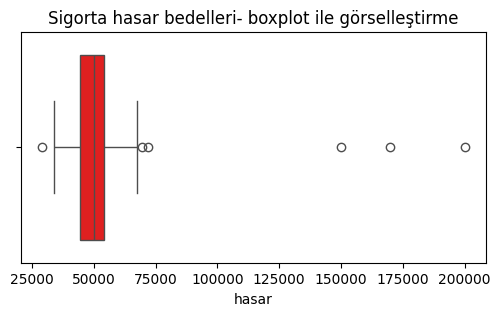

In [170]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["hasar"], color="red")
plt.title("Sigorta hasar bedelleri- boxplot ile görselleştirme")
plt.show()

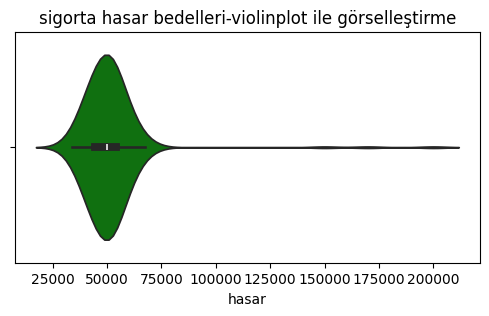

In [171]:
plt.figure(figsize=(6,3))
sns.violinplot(x=df["hasar"],color="green")
plt.title("sigorta hasar bedelleri-violinplot ile görselleştirme")
plt.show()

##IQR yöntemi ile outlier tespiti

In [172]:
#çeyrek değerlerin hesaplanması
q1 = df["hasar"].quantile(0.25)
q3 = df["hasar"].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(9786.317698634826)

In [173]:
alt_sinir = q1 - 1.5 * iqr
alt_sinir


np.float64(29792.21219022439)

In [174]:
ust_sinir = q3 + 1.5 * iqr
ust_sinir

np.float64(68937.48298476369)

In [175]:
#aykırı değerleri tespit et
aykiri_degerler = df[(df["hasar"] < alt_sinir) | (df["hasar"] > ust_sinir)]
print(aykiri_degerler)
print(len(aykiri_degerler))


             hasar
74    29042.039167
113   69705.936900
179   71761.353333
200  150000.000000
201  170000.000000
202  200000.000000
6


In [176]:
#aykırı değerlerin temizlenmesi

In [177]:
df["hasar_sinirlandirilmis"] = np.where(df["hasar"] > ust_sinir, ust_sinir,
                                        np.where(df["hasar"] < alt_sinir, alt_sinir, df["hasar"]))
df

,hasar,hasar_sinirlandirilmis
0,53973.713224,53973.713224
1,48893.885591,48893.885591
2,55181.508305,55181.508305
3,62184.238851,62184.238851
4,48126.773002,48126.773002
...,...,...
198,50465.669748,50465.669748
199,40856.237617,40856.237617
200,150000.000000,68937.482985
201,170000.000000,68937.482985


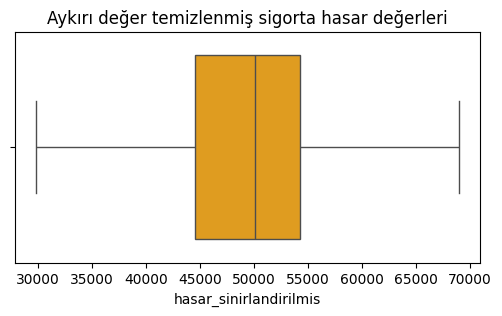

In [178]:
#yeni dağılımı görselleştirme
plt.figure(figsize=(6,3))
sns.boxplot(x=df["hasar_sinirlandirilmis"],color="orange")
plt.title("Aykırı değer temizlenmiş sigorta hasar değerleri")
plt.show()

In [179]:
#sonuç kontrol

In [180]:
print(f"temizleme öncesi veri sayısı: {len(df)}")
print(f"Aykırı değer sayısı: {len(aykiri_degerler)}")
print(f"Temizleme sonrası minimum hasar kaydı değeri: {df["hasar_sinirlandirilmis"].min()}")
print(f"Temizleme sonrası maksimum hasar kaydı değeri: {df["hasar_sinirlandirilmis"].max()}")

temizleme öncesi veri sayısı: 203
Aykırı değer sayısı: 6
Temizleme sonrası minimum hasar kaydı değeri: 29792.21219022439
Temizleme sonrası maksimum hasar kaydı değeri: 68937.48298476369


#Kategorik veriler
* Label Encoding
* One-Hot Encoding
* Dummy Vairable tuzağı önleme
* Kodlanmış veriyi dataframe de birleştirme

In [181]:
#veri seti oluşturma
import pandas as pd

data = {
    "cinsiyet":["erkek","kadın","kadın","erkek","kadın"],
    "uyelik turu":["standart","vip","premium","vip","premium"],
    "sehir":["istanbul","ankara","izmir","ankara","istanbul"],
    "gelir":[5000,7000,12000,6500,8500]

}
df = pd.DataFrame(data)
df

,cinsiyet,uyelik turu,sehir,gelir
0,erkek,standart,istanbul,5000
1,kadın,vip,ankara,7000
2,kadın,premium,izmir,12000
3,erkek,vip,ankara,6500
4,kadın,premium,istanbul,8500


In [182]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["cinsiyet_label"] = label_encoder.fit_transform(df["cinsiyet"])
df

,cinsiyet,uyelik turu,sehir,gelir,cinsiyet_label
0,erkek,standart,istanbul,5000,0
1,kadın,vip,ankara,7000,1
2,kadın,premium,izmir,12000,1
3,erkek,vip,ankara,6500,0
4,kadın,premium,istanbul,8500,1


In [183]:
df["uyelik_turu"] = label_encoder.fit_transform(df["uyelik turu"])
df

,cinsiyet,uyelik turu,sehir,gelir,cinsiyet_label,uyelik_turu
0,erkek,standart,istanbul,5000,0,1
1,kadın,vip,ankara,7000,1,2
2,kadın,premium,izmir,12000,1,0
3,erkek,vip,ankara,6500,0,2
4,kadın,premium,istanbul,8500,1,0


In [184]:
df["sehir_label"]=label_encoder.fit_transform(df["sehir"])
df

,cinsiyet,uyelik turu,sehir,gelir,cinsiyet_label,uyelik_turu,sehir_label
0,erkek,standart,istanbul,5000,0,1,1
1,kadın,vip,ankara,7000,1,2,0
2,kadın,premium,izmir,12000,1,0,2
3,erkek,vip,ankara,6500,0,2,0
4,kadın,premium,istanbul,8500,1,0,1


#One-hot encoding

In [185]:
from sklearn.preprocessing import OneHotEncoder

In [186]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_array = one_hot_encoder.fit_transform(df[["uyelik_turu"]])
encoded_array

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [187]:
#yeni sütun adlarını alalım
encoded_columns = one_hot_encoder.get_feature_names_out(["uyelik_turu"])

In [188]:
#yeni bir df oluştur
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)
encoded_df

,uyelik_turu_0,uyelik_turu_1,uyelik_turu_2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [189]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder (sparse_output=False,drop = "first")
encoded = ohe.fit_transform([["istanbul","ankara","izmir"]])
print(encoded)

[]


##Dummy variable tuzağı

In [190]:
encoded_df = encoded_df.drop(columns=["uyelik_turu_0"])
encoded_df

,uyelik_turu_1,uyelik_turu_2
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [191]:
#kodlanmış veriyi dataframe de birleştirme


In [192]:
df_final = pd.concat([df,encoded_df],axis=1)
df_final

,cinsiyet,uyelik turu,sehir,gelir,cinsiyet_label,uyelik_turu,sehir_label,uyelik_turu_1,uyelik_turu_2
0,erkek,standart,istanbul,5000,0,1,1,1.0,0.0
1,kadın,vip,ankara,7000,1,2,0,0.0,1.0
2,kadın,premium,izmir,12000,1,0,2,0.0,0.0
3,erkek,vip,ankara,6500,0,2,0,0.0,1.0
4,kadın,premium,istanbul,8500,1,0,1,0.0,0.0


In [193]:
df_final.drop(columns=["cinsiyet","uyelik turu","uyelik_turu"])

,sehir,gelir,cinsiyet_label,sehir_label,uyelik_turu_1,uyelik_turu_2
0,istanbul,5000,0,1,1.0,0.0
1,ankara,7000,1,0,0.0,1.0
2,izmir,12000,1,2,0.0,0.0
3,ankara,6500,0,0,0.0,1.0
4,istanbul,8500,1,1,0.0,0.0


##Veri dönüşümleri (Data Transformation)
Amaç: Veri setindeki değişkenlerin türlerini, biçimlerini ve dağılımlarını modelleme sürecine uygun hale getireceğiz.
* tarihler datetime a
* metinleri temizle
* eğik dağılımlar logaritmik dönüşüm ile dengelenir
*

In [194]:
#veri seti oluşturma:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
data = {
    "yas":["25","30","35","40","45"],
    "ise_baslama":["2020/01/05", "2019/03/10", "2021/07/15", "2018/12/20", "2017/09/01"],
    "pozisyon": [" Yazilimci", " yazilimci", "YAZILIMCI", "Yazılımcı", "Yazilimci"],
    "maas": [5000,7000,12000,8000,20000]

}
df = pd.DataFrame(data)
df

,yas,ise_baslama,pozisyon,maas
0,25,2020/01/05,Yazilimci,5000
1,30,2019/03/10,yazilimci,7000
2,35,2021/07/15,YAZILIMCI,12000
3,40,2018/12/20,Yazılımcı,8000
4,45,2017/09/01,Yazilimci,20000


In [196]:
#tip dönüşümü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   yas          5 non-null      object
 1   ise_baslama  5 non-null      object
 2   pozisyon     5 non-null      object
 3   maas         5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [197]:
df["yas"] = df["yas"].astype(int)
df.dtypes

,0
yas,int64
ise_baslama,object
pozisyon,object
maas,int64


In [198]:
df["ise_baslama"] = pd.to_datetime(df["ise_baslama"])
df.dtypes

,0
yas,int64
ise_baslama,datetime64[ns]
pozisyon,object
maas,int64


In [199]:
df["yil"] = df["ise_baslama"].dt.year
df

,yas,ise_baslama,pozisyon,maas,yil
0,25,2020-01-05,Yazilimci,5000,2020
1,30,2019-03-10,yazilimci,7000,2019
2,35,2021-07-15,YAZILIMCI,12000,2021
3,40,2018-12-20,Yazılımcı,8000,2018
4,45,2017-09-01,Yazilimci,20000,2017


In [200]:
df["month"] = df["ise_baslama"].dt.month
df

,yas,ise_baslama,pozisyon,maas,yil,month
0,25,2020-01-05,Yazilimci,5000,2020,1
1,30,2019-03-10,yazilimci,7000,2019,3
2,35,2021-07-15,YAZILIMCI,12000,2021,7
3,40,2018-12-20,Yazılımcı,8000,2018,12
4,45,2017-09-01,Yazilimci,20000,2017,9


In [201]:
#metinleri temizle
df["pozisyon_temiz"] = (
    df["pozisyon"]
    .str.strip()#baştaki ve sondaki gereksiz boşlukları kaldır
    .str.lower()#kucuk harfe cevirme
    .str.replace("ı","i")#turkce karakter silme
)
df

,yas,ise_baslama,pozisyon,maas,yil,month,pozisyon_temiz
0,25,2020-01-05,Yazilimci,5000,2020,1,yazilimci
1,30,2019-03-10,yazilimci,7000,2019,3,yazilimci
2,35,2021-07-15,YAZILIMCI,12000,2021,7,yazilimci
3,40,2018-12-20,Yazılımcı,8000,2018,12,yazilimci
4,45,2017-09-01,Yazilimci,20000,2017,9,yazilimci


In [202]:
#log dönüşüm

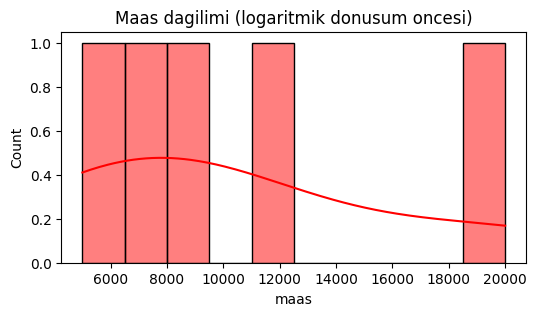

In [203]:
plt.figure(figsize=(6,3))
sns.histplot(df["maas"],bins=10,color="red",kde=True)
plt.title("Maas dagilimi (logaritmik donusum oncesi)")
plt.show()


In [204]:
df["maas_log"] = np.log1p(df["maas"])
df

,yas,ise_baslama,pozisyon,maas,yil,month,pozisyon_temiz,maas_log
0,25,2020-01-05,Yazilimci,5000,2020,1,yazilimci,8.517393
1,30,2019-03-10,yazilimci,7000,2019,3,yazilimci,8.853808
2,35,2021-07-15,YAZILIMCI,12000,2021,7,yazilimci,9.392745
3,40,2018-12-20,Yazılımcı,8000,2018,12,yazilimci,8.987322
4,45,2017-09-01,Yazilimci,20000,2017,9,yazilimci,9.903538


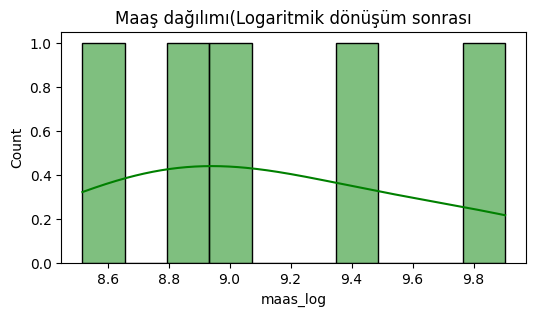

In [205]:
plt.figure(figsize=(6,3))
sns.histplot(df["maas_log"],bins=10,color="green",kde=True)
plt.title("Maaş dağılımı(Logaritmik dönüşüm sonrası")
plt.show()

##Veri Tutarlılığı ve Yinelenen Kayıtlar (Data Consistency)
* Duplicate control
* sütun adlarındaki boşluk ve hataları düzeltmek
* karakter, biçim ve yazım farklarını gidermek
* verinin istatistiksel tutarlılığını sağlamak(yas < 0 olamaz)

In [206]:
import pandas as pd
import numpy as np


#örnek veri seti
data = {
    "musteri_adi*":["Ali Veli", "ali veli","Ali Veli","Kaan Can","Kaan Can"],
    "Sehir": ["Ankara","ANKARA","ankara","İzmir","İzmir"],
    "yas ": [28, 28, 28, 35, 35],
    "maas": [7000, 7000, 7000, 8500, 8500]
}

df = pd.DataFrame(data)

In [207]:
df

,musteri_adi*,Sehir,yas,maas
0,Ali Veli,Ankara,28,7000
1,ali veli,ANKARA,28,7000
2,Ali Veli,ankara,28,7000
3,Kaan Can,İzmir,35,8500
4,Kaan Can,İzmir,35,8500


In [208]:
df.columns
#yazınca sütunlardaki boşlukları görebilirsin

Index(['musteri_adi*', 'Sehir', 'yas ', 'maas'], dtype='object')

In [209]:
#sutun adlarının temizlenmesi

In [210]:
df.columns  = df.columns.str.strip().str.lower().str.replace("*","")
df.columns

Index(['musteri_adi', 'sehir', 'yas', 'maas'], dtype='object')

In [211]:
#yinelenen kayıtların tespiti
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,True


In [212]:
#tekrarlanan satırları sil
df = df.drop_duplicates()

In [213]:
df

,musteri_adi,sehir,yas,maas
0,Ali Veli,Ankara,28,7000
1,ali veli,ANKARA,28,7000
2,Ali Veli,ankara,28,7000
3,Kaan Can,İzmir,35,8500


In [214]:
#metin tutarlılığı sağlama
df["musteri_adi"] = (
    df["musteri_adi"]
   .str.strip()
   .str.lower()
   .str.replace(r"\s+"," ", regex=True) #çift boşluk ları tek yapar
  )


/tmp/ipython-input-188857767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["musteri_adi"] = (


In [215]:
df

,musteri_adi,sehir,yas,maas
0,ali veli,Ankara,28,7000
1,ali veli,ANKARA,28,7000
2,ali veli,ankara,28,7000
3,kaan can,İzmir,35,8500


In [216]:
df["sehir"] = df["sehir"].str.strip().str.title()

/tmp/ipython-input-332805563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sehir"] = df["sehir"].str.strip().str.title()


In [217]:
df

,musteri_adi,sehir,yas,maas
0,ali veli,Ankara,28,7000
1,ali veli,Ankara,28,7000
2,ali veli,Ankara,28,7000
3,kaan can,İzmir,35,8500


In [218]:
#mantıksal tutarlılık kontrolü
mantiksiz = df[(df["yas"] < 0) | (df["yas"] > 120)]
print(mantiksiz if not mantiksiz.empty else "Tüm yaş değerleri mantıklı.")

Tüm yaş değerleri mantıklı.


In [219]:
df.duplicated()

,0
0,False
1,True
2,True
3,False


In [220]:
df = df.drop_duplicates()

In [221]:
df

,musteri_adi,sehir,yas,maas
0,ali veli,Ankara,28,7000
3,kaan can,İzmir,35,8500


##Veri bölme (Train/Test Split)
* Bir ml modelini eğitirken elimizdeki tüm veriyi hem eğitim hemde test için aynı anda kullanamayız. çünkü bu durumda model, test verilerini zaten öğrenmiş olur ve gerçekte performansını doğru ölçemeyiz. bu nedenle veriyi ikiye ayırırız.
* train dataset
* test dataset

---
Veri bölme (train/test split): mevcut veri setini belirli oranlarda eğitim ve test gruplarına ayırma işlemidir. Amacımız modelin öğrenme ve genelleme yeteneğini ayrı ayrı ölçebilmek.






10k müşteri olsa
* train: 8000 müşteri
* test: 2000 müşteri(validasyon olsa teste 1000 müşteri kaldı)
* (validasyon): 1000 müşteri

In [222]:
"""
db: müşteri veriseti
"""
import pandas as pd

data = {
    "gelir":[5000, 7000, 9000, 3000, 7000, 6899, 3555,5000,7000,3000],
    "yas": [34, 45,98,45,67,34,24,29,30,34],
    "kredi_durumu": ["1","0","1","0","0","1","1","0","1","0"]
}

df = pd.DataFrame(data)
df


,gelir,yas,kredi_durumu
0,5000,34,1
1,7000,45,0
2,9000,98,1
3,3000,45,0
4,7000,67,0
5,6899,34,1
6,3555,24,1
7,5000,29,0
8,7000,30,1
9,3000,34,0


#bağımsız değişkenler(X), bağımlı değişkenler ise (y)

y: kredi_durumu
x: gelir, yas

In [223]:
x = df[["gelir","yas"]]
y = df["kredi_durumu"]

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size = 0.2,#%20 test,%80 eğitim
    random_state = 42,
    stratify=y #sınıf dağılımını korur
)

In [225]:
x_train.shape

(8, 2)

In [226]:
y_train.shape

(8,)

###Mini proje: Boston Housing Veri Seti Temizleme

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [228]:
#veri yükleme


In [229]:
def load():
  data = pd.read_csv("housing.csv")
  return data

df = load()


In [230]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [231]:
#Aykırı değer tespit ve temizleme
Q1, Q3 = df["RM"].quantile(0.25),df["RM"].quantile(0.75)
iqr = Q3 - Q1
alt_sinir = Q1 - 1.5 * iqr
ust_sinir = Q3 + 1.5 * iqr
df["RM"] = np.where(df["RM"] > ust_sinir, ust_sinir, np.where(df["RM"] < alt_sinir, alt_sinir, df["RM"]))
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [232]:
df.shape


(506, 14)

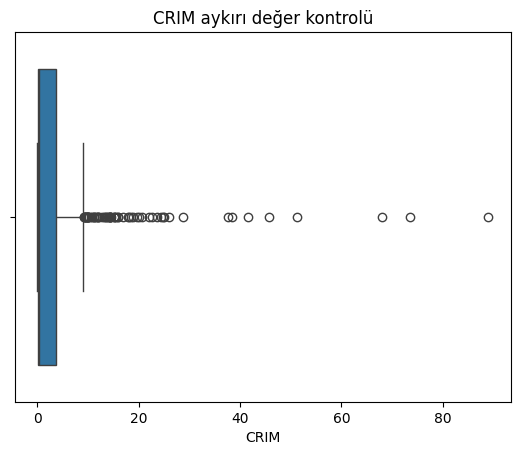

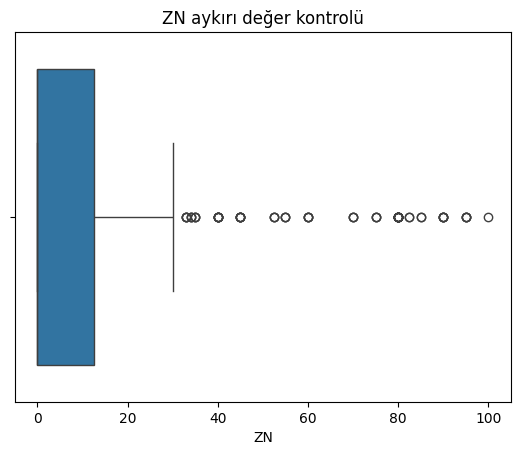

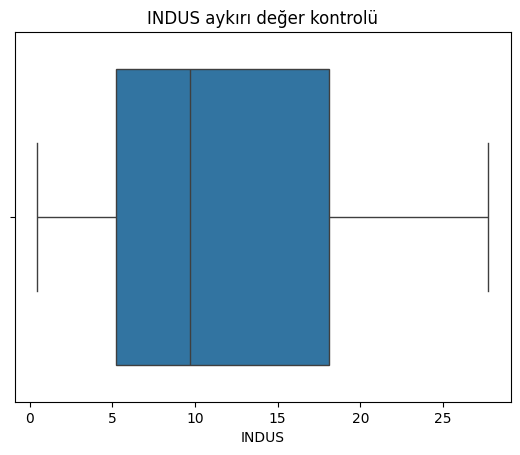

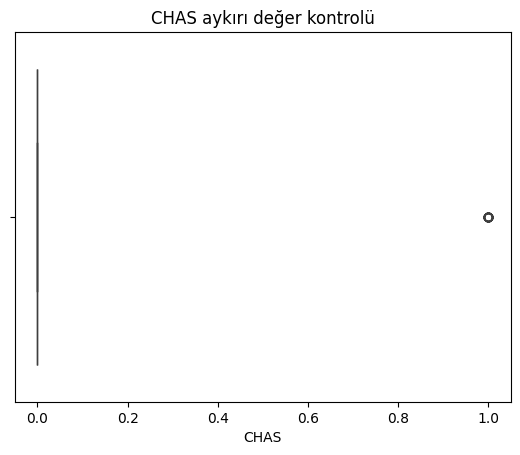

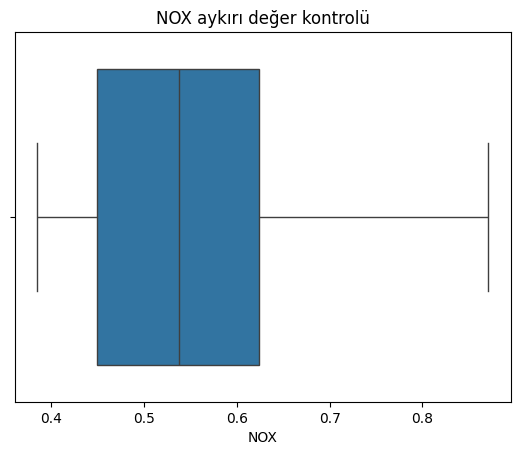

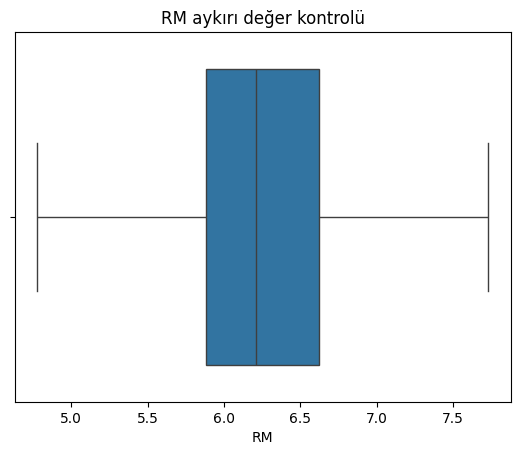

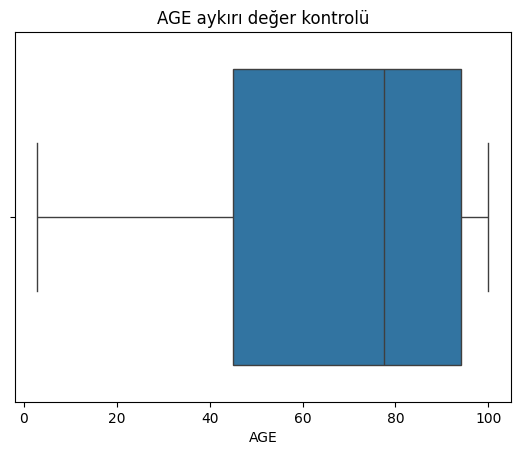

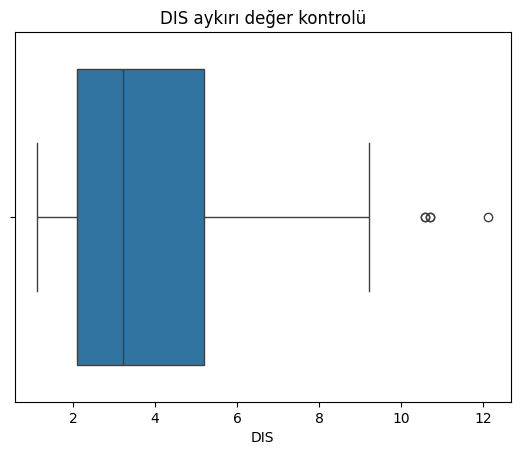

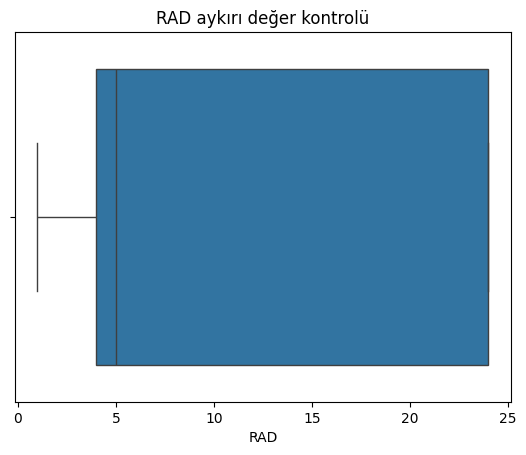

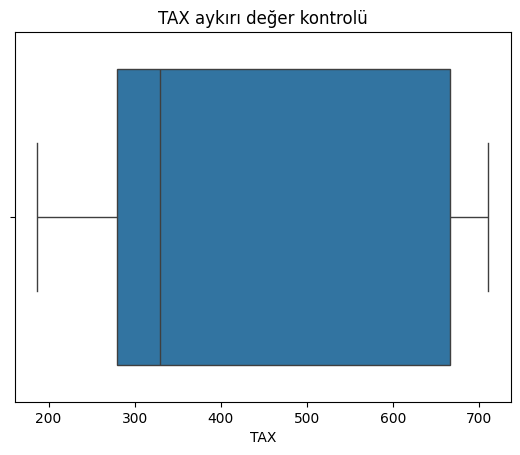

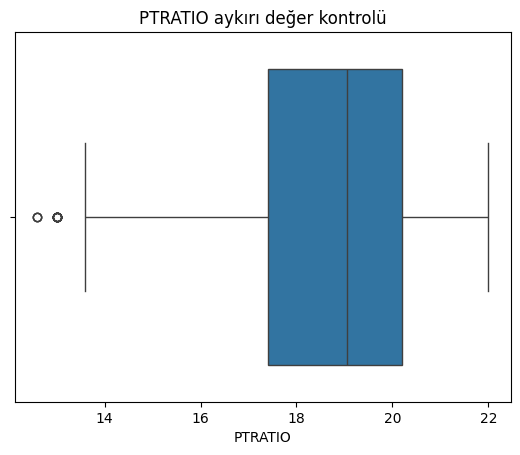

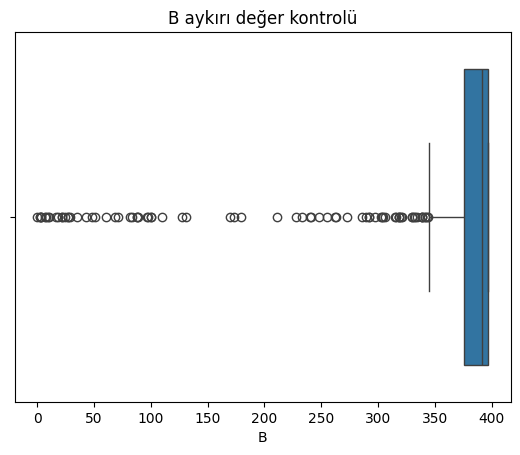

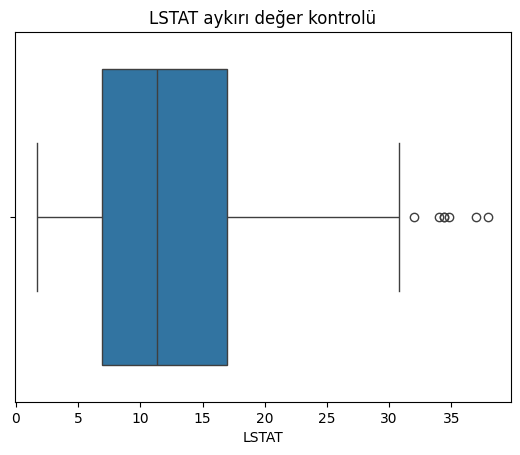

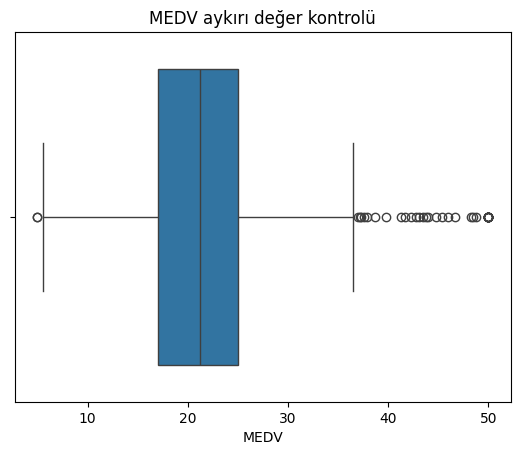

In [233]:
numeric_cols = df.select_dtypes(include=["int64","float64"])

for col in numeric_cols.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"{col} aykırı değer kontrolü")
    plt.show()

In [234]:
df["RAD"]=df["RAD"].astype(int)

In [235]:
#veri dönüşümleri
df["lstat_log"] = np.log1p(df["LSTAT"])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.788421
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2.316488
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.615420
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.371181
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,2.367436
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,2.310553
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1.893112
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,2.012233


In [236]:
#tutarlılık kontrolü
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
501,False
502,False
503,False
504,False


In [237]:
#veri bölme
x = df.drop(columns=["MEDV"])#bağımsız değişkenler,features,model hedefi girdi olarak görmemeli
y = df["MEDV"]#hedef değişken
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [238]:
x_train.shape

(404, 14)

In [239]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.788421
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2.316488
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.615420
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.371181
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.845300


##outlier temizleme

In [240]:
def iqr_capping(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr =q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  df[col] = df[col].clip(lower,upper)
  return df

In [241]:
for col in numeric_cols.columns:
  if col != "MEDV":
    df = iqr_capping(df,col)

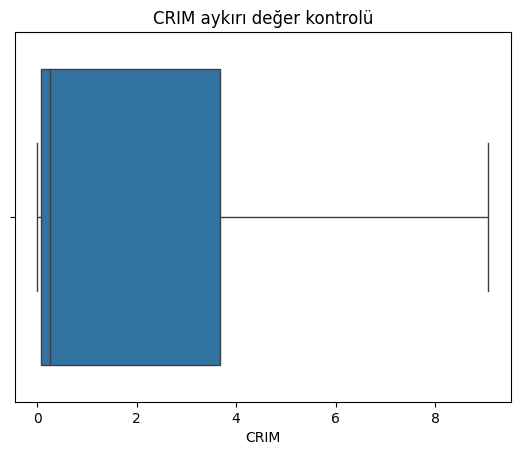

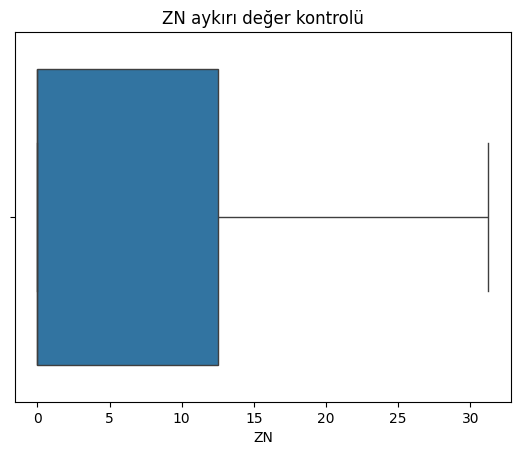

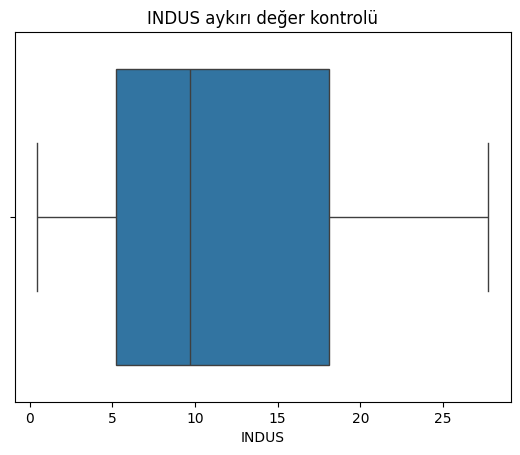

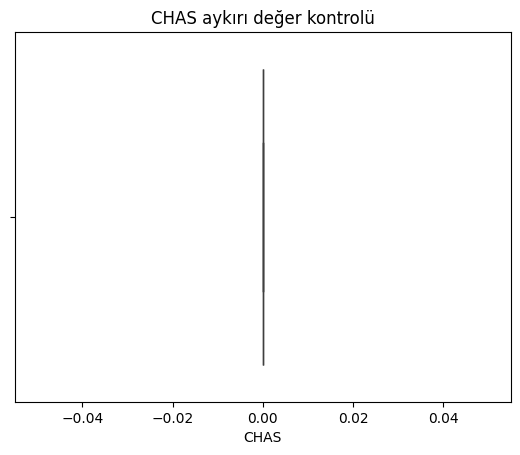

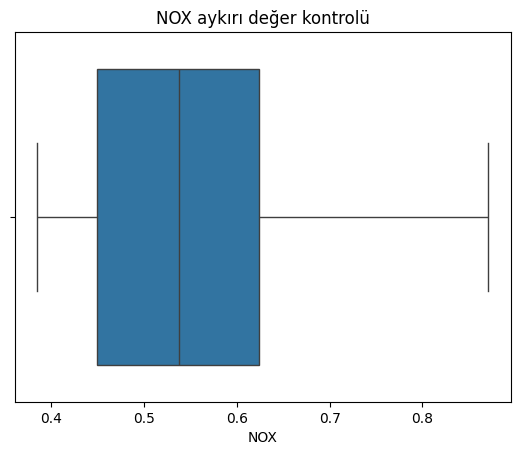

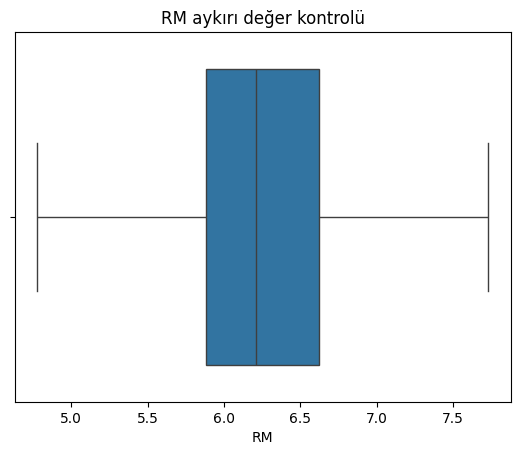

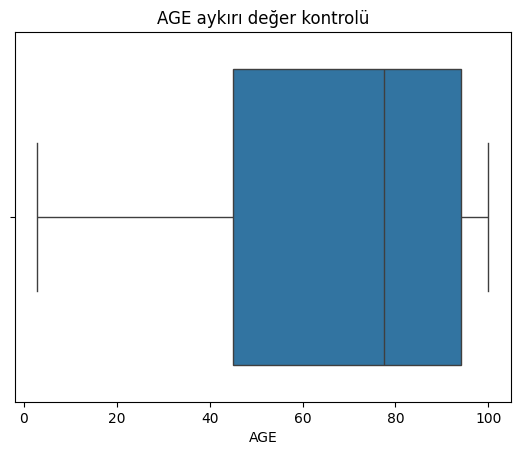

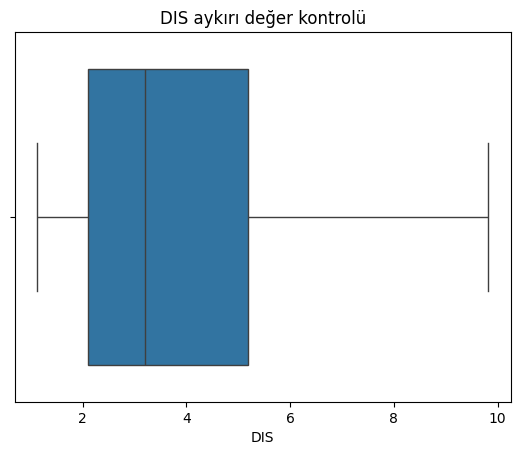

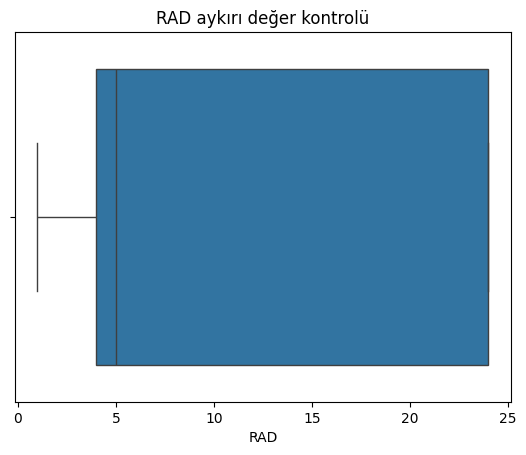

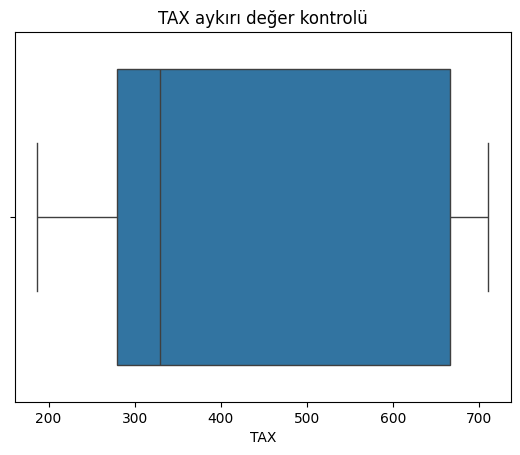

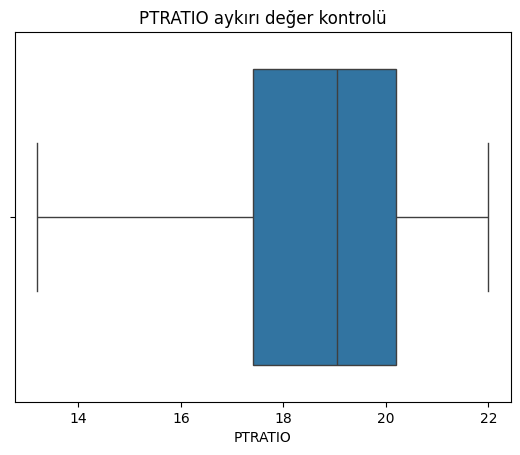

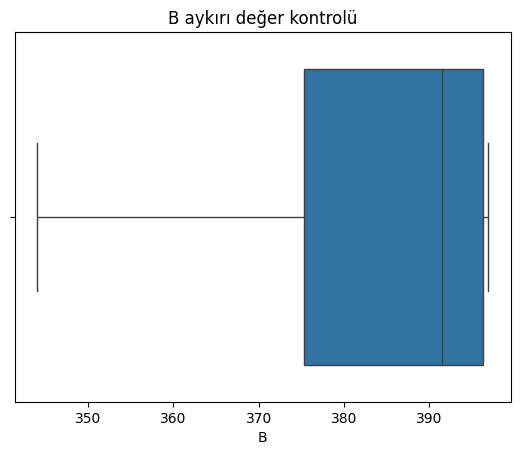

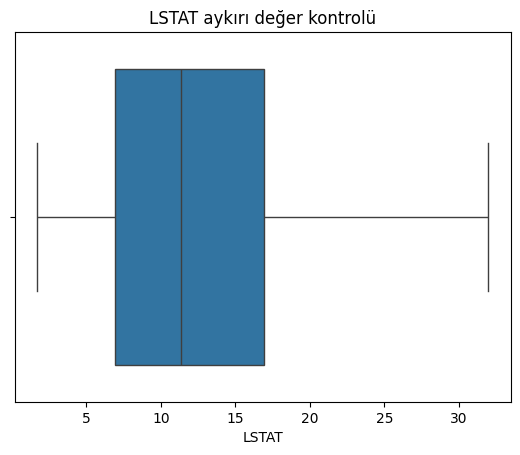

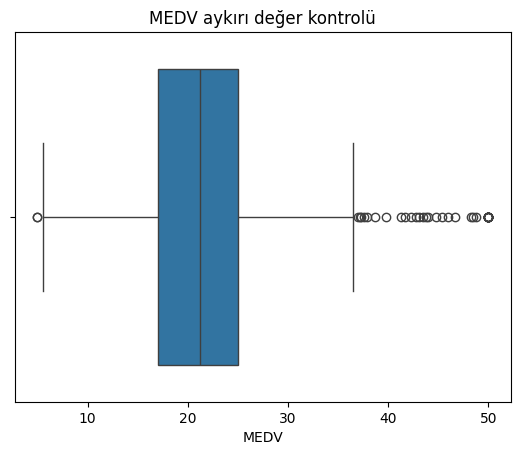

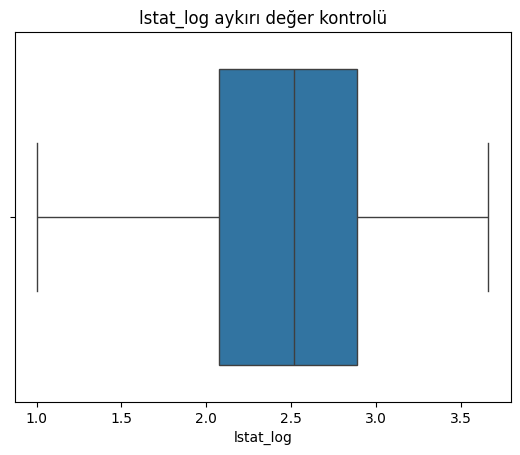

In [242]:
numeric_cols = df.select_dtypes(include=["int64","float64"])

for col in numeric_cols.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"{col} aykırı değer kontrolü")
    plt.show()

In [243]:
log_cols = ["CRIM","TAX","DIS","LSTAT"]
for col in log_cols:
  df[col] = np.log1p(df[col])
  #yeni kolon eklemez
  #df["lstat_log"] = np.log1p(df["LSTAT"]), yeni kolon ekler

In [244]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_log
0,0.006300,18.0,2.31,0,0.538,6.575,65.2,1.627278,1,5.693732,15.3,396.90,1.788421,24.0,1.788421
1,0.026944,0.0,7.07,0,0.469,6.421,78.9,1.786261,2,5.493061,17.8,396.90,2.316488,21.6,2.316488
2,0.026924,0.0,7.07,0,0.469,7.185,61.1,1.786261,2,5.493061,17.8,392.83,1.615420,34.7,1.615420
3,0.031857,0.0,2.18,0,0.458,6.998,45.8,1.954757,3,5.407172,18.7,394.63,1.371181,33.4,1.371181
4,0.066770,0.0,2.18,0,0.458,7.147,54.2,1.954757,3,5.407172,18.7,396.90,1.845300,36.2,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,11.93,0,0.573,6.593,69.1,1.246630,1,5.613128,21.0,391.99,2.367436,22.4,2.367436
502,0.044275,0.0,11.93,0,0.573,6.120,76.7,1.190127,1,5.613128,21.0,396.90,2.310553,20.6,2.310553
503,0.058986,0.0,11.93,0,0.573,6.976,91.0,1.152943,1,5.613128,21.0,396.90,1.893112,23.9,1.893112
504,0.103991,0.0,11.93,0,0.573,6.794,89.3,1.220505,1,5.613128,21.0,393.45,2.012233,22.0,2.012233


In [245]:
print(df.shape)
print(df.columns)
print(type(df))

(506, 15)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'lstat_log'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


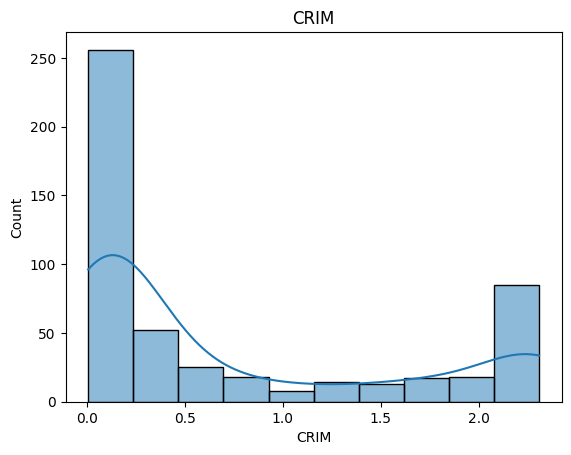

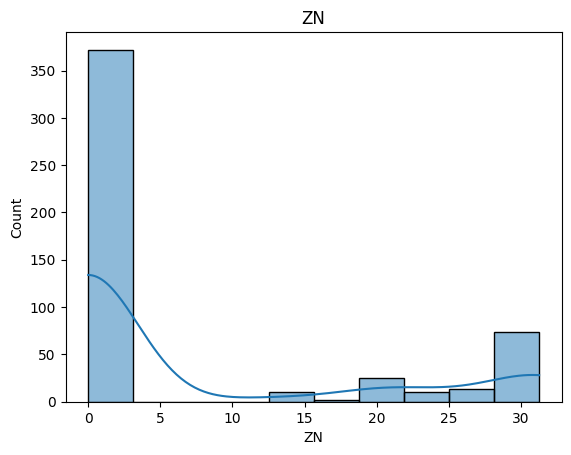

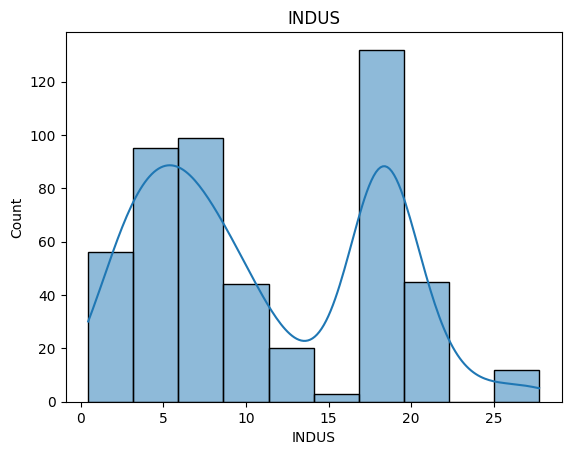

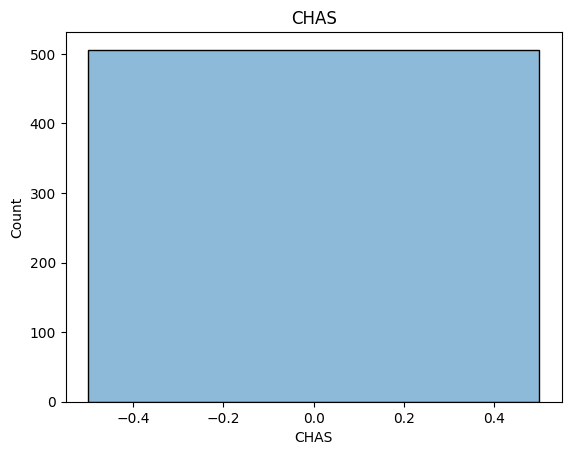

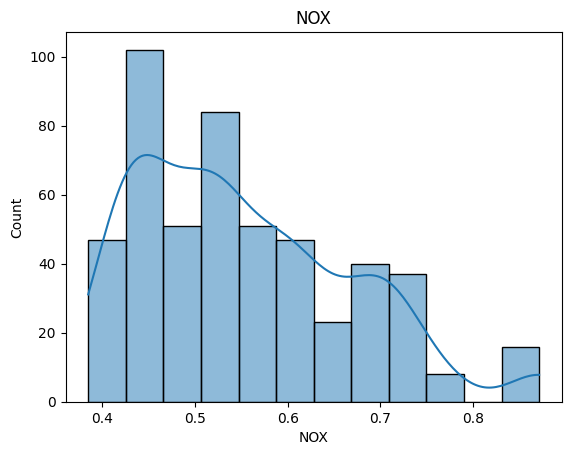

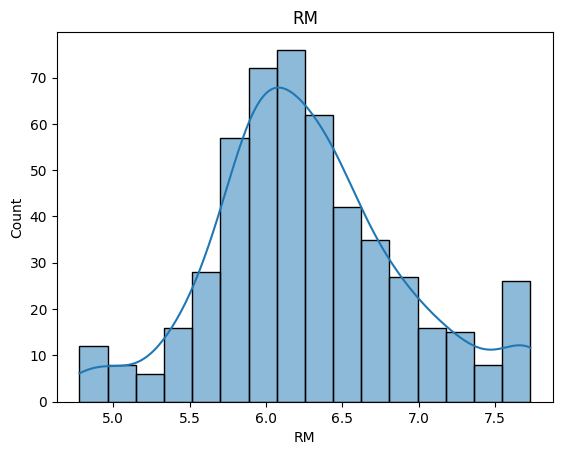

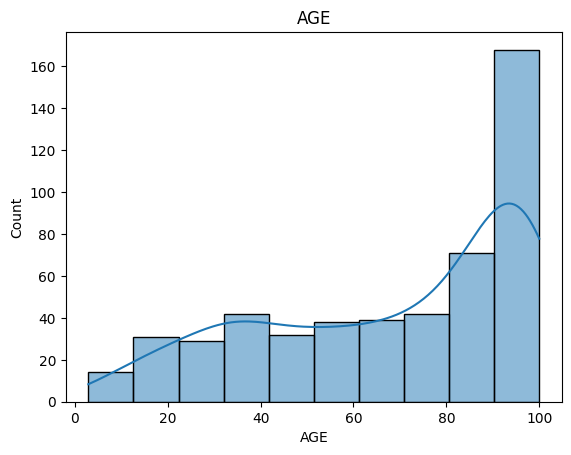

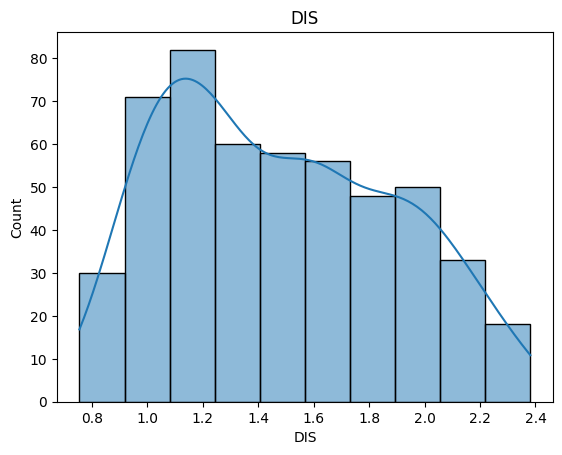

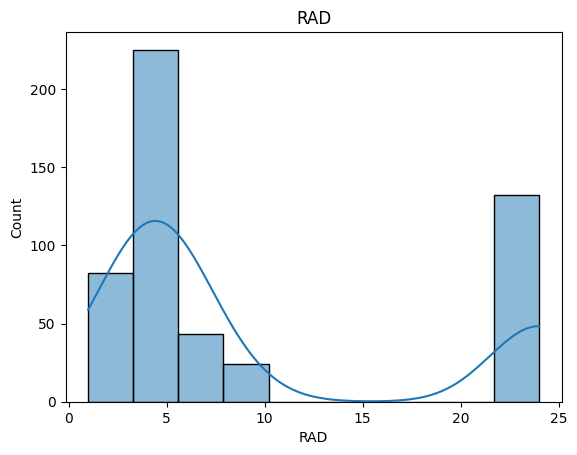

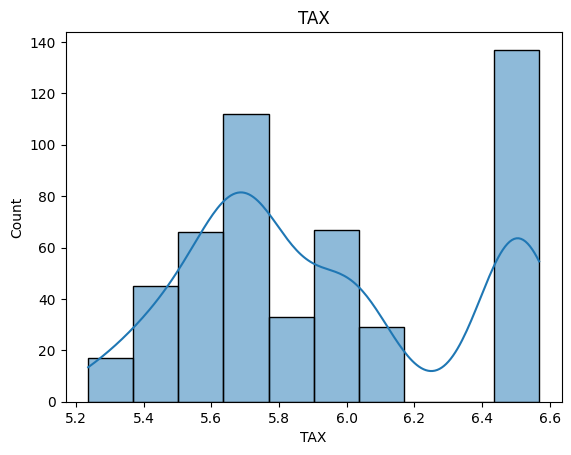

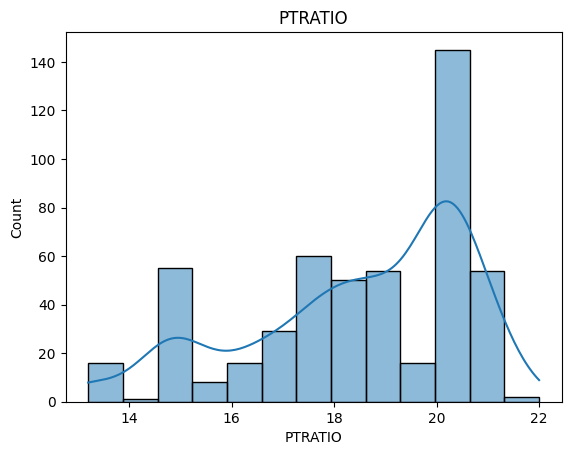

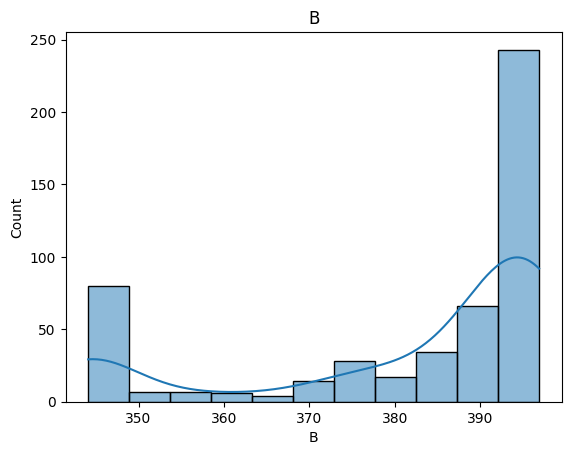

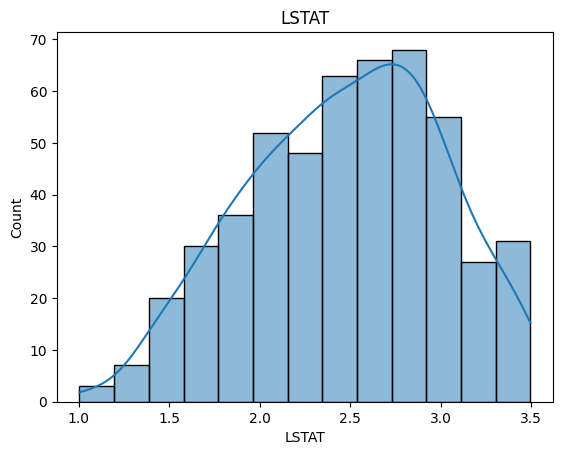

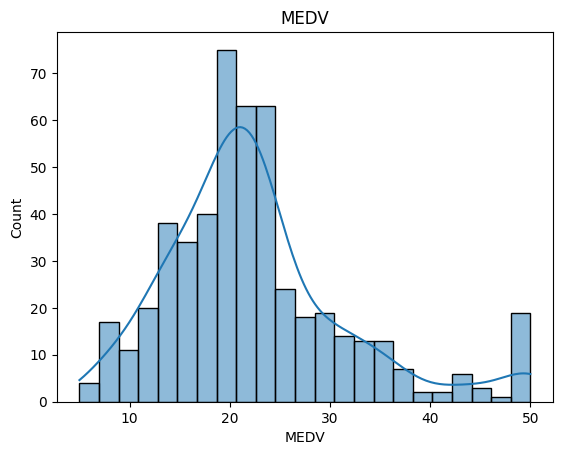

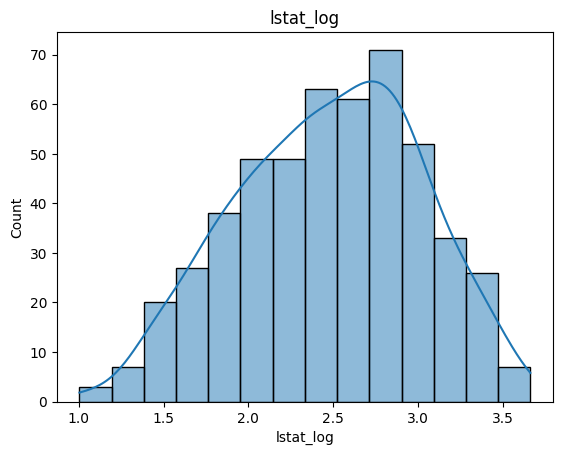

In [246]:
for col in numeric_cols.columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  lstat_log  506 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


In [248]:
#veri tutarlılığı kontrolü


In [249]:
df["CHAS"].unique()

array([0])

In [250]:
#bu değerler hep pozitif olmalı
positive_cols = [
    "CRIM","MEDV","ZN","INDUS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","LSTAT"
]
(df[positive_cols] < 0).sum()

,0
CRIM,0
MEDV,0
ZN,0
INDUS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [251]:
#oran kontrolleri
df[["ZN","INDUS","AGE","LSTAT"]].describe()

,ZN,INDUS,AGE,LSTAT
count,506.000000,506.000000,506.000000,506.000000
mean,6.963439,11.136779,68.574901,2.474435
std,12.028788,6.860353,28.148861,0.536674
min,0.000000,0.460000,2.900000,1.004302
25%,0.000000,5.190000,45.025000,2.073162
50%,0.000000,9.690000,77.500000,2.514464
75%,12.500000,18.100000,94.075000,2.887869
max,31.250000,27.740000,100.000000,3.495371


In [252]:
#hava kirliliği
df["NOX"].describe()

,NOX
count,506.000000
mean,0.554695
std,0.115878
min,0.385000
25%,0.449000
50%,0.538000
75%,0.624000
max,0.871000


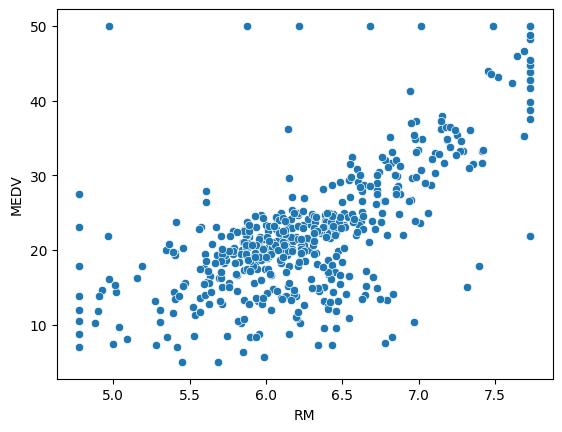

In [253]:
#mantıksal ilişki kontrolleri
sns.scatterplot(x=df["RM"],y=df["MEDV"])
plt.show()


Outlierlar mevcut


In [254]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Sadece sınırlar içindeki verileri filtrele
df_final = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]

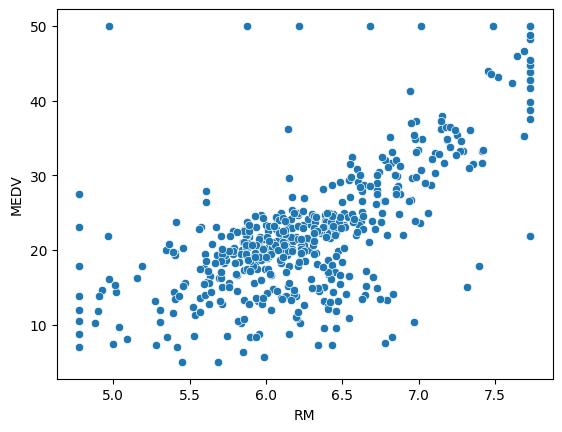

In [255]:
sns.scatterplot(x=df["RM"],y=df["MEDV"])
plt.show()

In [256]:
df = df[df["MEDV"] < 50]
#MEDV değerleri 50 olanları sildik

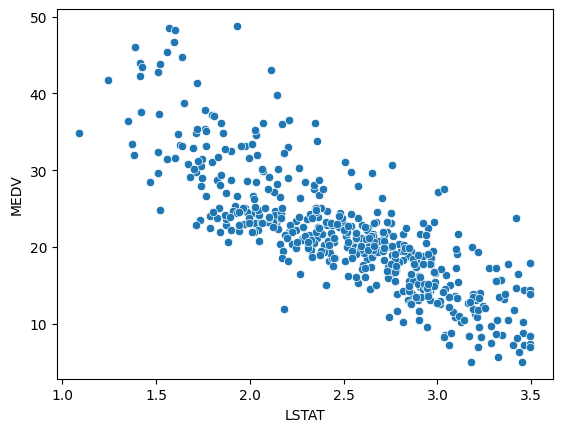

In [257]:
sns.scatterplot(x=df["LSTAT"], y=df["MEDV"])
plt.show()

In [258]:
#mantıksız değer kontrolü
mantiksiz = df[(df["RM"] < 1) | (df["PTRATIO"] < 5)]
print(mantiksiz if not mantiksiz.empty else "Tüm değerler mantıklı")

Tüm değerler mantıklı


In [259]:
#kopya kontrolü
df.duplicated().sum()

np.int64(0)

In [260]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


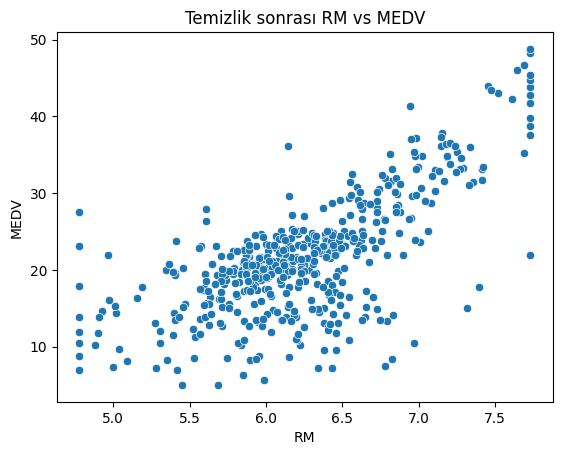

In [261]:
sns.scatterplot(x=df["RM"], y=df["MEDV"])
plt.title("Temizlik sonrası RM vs MEDV")
plt.show()

In [263]:
#veri bölme
from sklearn.model_selection import train_test_split

x=df.drop("MEDV", axis=1)
y = df["MEDV"]

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state = 42,
)

In [264]:
print(x_train.shape)
print(x_test.shape)

(392, 14)
(98, 14)
